<a href="https://colab.research.google.com/github/NightMachinary/soal_playground/blob/master/sk_playground.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import numpy as np
import pandas
pd = pandas

In [62]:
! apt install -y unzip aria2 ncdu htop

Reading package lists... Done
Building dependency tree       
Reading state information... Done
htop is already the newest version (2.1.0-3).
aria2 is already the newest version (1.33.1-1).
ncdu is already the newest version (1.12-1).
unzip is already the newest version (6.0-21ubuntu1.1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.


In [31]:
!pip3 install -U scikit-learn fastai 
!pip3 install -U skorch
# scikit-neuralnetwork

In [32]:
from sklearn import datasets

In [33]:
from fastai.torch_core import show_image, show_images

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
iris = datasets.load_iris()
iris

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [36]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [37]:
digits = datasets.load_digits()
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [38]:
print(f"digits_x: {digits.data.shape}, digits_y: {digits.target.shape}")

digits_x: (1797, 64), digits_y: (1797,)


In [39]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

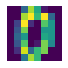

In [40]:
show_image(digits.images[0])

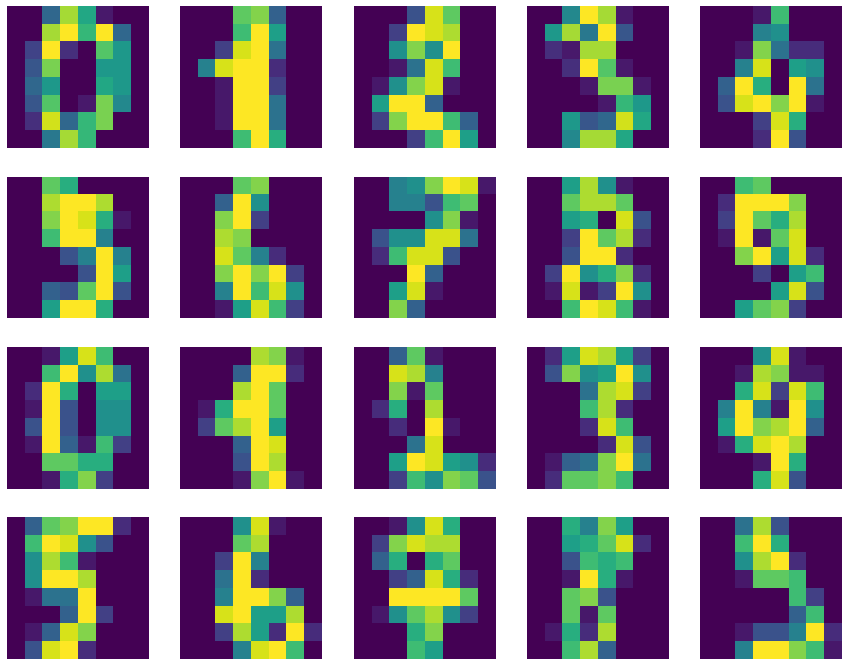

In [41]:
show_images(digits.images, ncols=5, nrows=4)

# SVC

In [42]:
import numpy as np

from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn import metrics

from sklearn.model_selection import train_test_split
#: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
#: https://scikit-learn.org/0.16/modules/generated/sklearn.cross_validation.train_test_split.html

from sklearn.preprocessing import MinMaxScaler
#: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

from sklearn.neural_network import MLPRegressor
from sklearn.metrics import accuracy_score

In [43]:
##
# clf = SVC()
##
clf = KMeans(n_clusters=10, max_iter=10_000)
##

In [44]:
##
# train_x = digits.data[0:1000]
# train_y = digits.target[0:1000]
# val_x = digits.data[1000:]
# val_y = digits.target[1000:]
##
train_x, val_x, train_y, val_y = \
train_test_split(digits.data, digits.target, test_size=0.25)

# normalize the data via scaling
t = MinMaxScaler()
t.fit(train_x)
train_x = t.transform(train_x)
val_x = t.transform(val_x)
##
train_x.shape

(1347, 64)

In [45]:
clf.fit(train_x, train_y)

KMeans(max_iter=10000, n_clusters=10)

In [46]:
preds = clf.predict(val_x)
preds

array([2, 2, 4, 9, 2, 6, 3, 5, 9, 8, 3, 5, 5, 1, 7, 0, 3, 9, 3, 3, 2, 9,
       1, 4, 3, 5, 4, 4, 1, 3, 1, 2, 2, 9, 2, 9, 6, 3, 9, 6, 1, 3, 6, 9,
       8, 8, 5, 5, 8, 6, 2, 9, 3, 8, 7, 4, 5, 7, 3, 7, 2, 1, 2, 1, 2, 2,
       3, 0, 9, 1, 7, 0, 6, 1, 5, 6, 9, 0, 3, 5, 5, 0, 7, 5, 3, 2, 1, 6,
       0, 9, 7, 4, 2, 8, 6, 9, 6, 2, 9, 1, 8, 9, 8, 1, 1, 5, 2, 7, 6, 8,
       5, 1, 2, 5, 3, 6, 5, 8, 2, 4, 5, 8, 1, 7, 1, 1, 7, 1, 4, 0, 6, 6,
       2, 5, 3, 8, 5, 6, 5, 9, 1, 2, 7, 4, 9, 5, 2, 1, 3, 6, 9, 2, 9, 7,
       6, 8, 2, 0, 6, 2, 3, 0, 7, 7, 1, 2, 8, 6, 7, 5, 8, 7, 9, 7, 9, 2,
       4, 2, 8, 0, 7, 6, 6, 8, 4, 2, 0, 8, 5, 3, 3, 2, 3, 6, 0, 0, 0, 7,
       5, 1, 9, 1, 3, 4, 8, 3, 2, 7, 3, 0, 8, 3, 6, 3, 7, 6, 3, 0, 3, 7,
       2, 4, 7, 7, 9, 2, 3, 4, 7, 7, 3, 9, 1, 3, 0, 4, 6, 3, 4, 0, 4, 4,
       2, 3, 5, 2, 1, 3, 0, 7, 3, 7, 7, 8, 3, 4, 7, 4, 3, 4, 9, 5, 1, 9,
       7, 4, 3, 1, 8, 5, 9, 4, 9, 1, 7, 9, 6, 2, 7, 4, 8, 9, 3, 3, 5, 2,
       5, 7, 8, 6, 3, 1, 6, 2, 5, 1, 3, 7, 1, 9, 5,

In [47]:
val_y

array([8, 8, 5, 3, 1, 0, 9, 6, 2, 7, 3, 6, 6, 2, 4, 9, 9, 3, 9, 9, 1, 3,
       2, 8, 9, 6, 5, 5, 2, 9, 2, 1, 4, 3, 8, 3, 0, 9, 3, 0, 2, 9, 0, 3,
       7, 7, 6, 6, 7, 0, 1, 3, 9, 9, 4, 5, 6, 4, 8, 4, 1, 2, 1, 2, 8, 1,
       5, 9, 3, 2, 4, 6, 0, 2, 6, 0, 3, 1, 9, 6, 6, 8, 4, 6, 9, 1, 1, 0,
       1, 3, 4, 9, 1, 7, 0, 3, 0, 1, 3, 2, 7, 3, 7, 2, 2, 5, 8, 4, 0, 7,
       6, 1, 8, 6, 9, 0, 6, 7, 3, 5, 6, 7, 2, 4, 2, 2, 4, 2, 9, 9, 0, 0,
       1, 6, 8, 7, 6, 0, 6, 3, 2, 8, 4, 5, 3, 6, 8, 2, 9, 0, 3, 1, 8, 4,
       0, 2, 3, 1, 0, 3, 9, 1, 4, 4, 2, 1, 7, 0, 4, 6, 7, 4, 3, 4, 3, 1,
       9, 1, 7, 9, 4, 0, 0, 7, 5, 1, 9, 7, 6, 9, 3, 1, 9, 0, 1, 1, 8, 4,
       6, 2, 3, 2, 9, 5, 7, 9, 8, 4, 9, 9, 7, 5, 0, 9, 4, 0, 8, 4, 9, 4,
       8, 5, 4, 4, 3, 8, 8, 5, 4, 4, 3, 3, 2, 9, 9, 5, 0, 5, 5, 9, 5, 5,
       8, 9, 6, 1, 2, 9, 1, 4, 5, 4, 4, 7, 2, 5, 4, 5, 3, 5, 8, 6, 2, 2,
       4, 5, 9, 2, 7, 6, 2, 5, 3, 2, 4, 2, 0, 8, 4, 5, 7, 3, 9, 8, 6, 1,
       6, 4, 7, 0, 9, 2, 0, 1, 6, 2, 8, 4, 2, 3, 6,

In [48]:
permu = {
    6: 1,
    9: 4,
    1: 0,
    5: 5,
    7: 3,
    2: 6,
    3: 9,
    4: 7,
    8: 8,
    0: 2,
}
preds_permuted = [permu[p] for p in preds]
sum(preds_permuted == val_y)/len(preds)

0.1

In [49]:
metrics.completeness_score(val_y, preds)

0.7516256174062698

In [50]:
metrics.homogeneity_score(val_y, preds)

0.7465856528198382

In [51]:
sum(preds == val_y)/len(preds)

0.03111111111111111

# reddit_sample

## loading the data

In [52]:
!aria2c 'https://archive.ics.uci.edu/ml/machine-learning-databases/00441/repeat_consumption_data.zip'
!unzip repeat_consumption_data.zip


01/11 21:09:30 [NOTICE] Downloading 1 item(s)

01/11 21:09:31 [NOTICE] File already exists. Renamed to /content/repeat_consumption_data.1.zip.

01/11 21:09:35 [NOTICE] Download complete: /content/repeat_consumption_data.1.zip

Download Results:
gid   |stat|avg speed  |path/URI
======+====+===========+=======================================================
6d136c|OK  |    14MiB/s|/content/repeat_consumption_data.1.zip

Status Legend:
(OK):download completed.
Archive:  repeat_consumption_data.zip
replace data/.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace __MACOSX/data/._.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [53]:
train_path = "/content/data/reddit_sample/train.csv"

In [54]:
train_raw = pd.read_csv(train_path, names=['x','y','z'])
train_raw

,x,y,z
0,0,741,1
1,0,877,189
2,0,5773,1
3,0,6492,3
4,0,7083,2
...,...,...,...
379545,20023,17045,1
379546,20023,18347,2
379547,20023,21204,2
379548,20023,21342,1


In [55]:
train_mat = train_raw.pivot(index="x", columns="y", values="z")
train_mat

y,1,3,4,5,6,8,9,13,14,15,16,17,20,22,23,25,29,31,33,35,36,37,39,41,43,44,46,47,48,49,50,51,52,56,58,59,63,64,65,66,...,21331,21333,21334,21335,21338,21340,21341,21342,21344,21345,21346,21347,21349,21351,21352,21353,21354,21355,21356,21358,21359,21360,21361,21362,21363,21365,21367,21368,21371,21372,21373,21374,21375,21376,21377,21378,21381,21382,21383,21385
x,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
train_mat.loc[0,741]

1.0

In [57]:
train_mat.loc[0,17045]

nan

In [58]:
train_np = train_mat.to_numpy(na_value=0.)
train_np

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [59]:
train_np.shape

(20024, 13456)

In [60]:
train_np[0][[train_np[0] != 0]]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  """Entry point for launching an IPython kernel.


array([  1., 189.,   1.,   3.,   2.,  22.,   2.,   5.,   4.,   8.,   1.,
         3.,   1.,   2.,   1.,  10.,   1.,   3.])

## k-means

In [73]:
clf = KMeans(n_clusters=100, max_iter=100_000)

In [74]:
clf.fit(train_np)

KMeans(max_iter=100000, n_clusters=100)

In [75]:
train_pred = clf.predict(train_np)
train_pred

array([67, 30, 30, ..., 30, 30, 30], dtype=int32)

In [76]:
train_pred_pd = pd.Series(train_pred)
train_pred_pd

0        67
1        30
2        30
3        30
4        30
         ..
20019    30
20020    30
20021    30
20022    30
20023    30
Length: 20024, dtype: int32

In [78]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
  print(train_pred_pd.value_counts())

30    18704
67      708
38       92
45       80
0        62
58       28
3        26
39       25
40       23
90       19
28       18
96       17
44       15
65       14
23       11
50        9
10        9
73        9
77        9
64        8
91        8
81        7
94        5
8         5
37        5
71        4
19        4
86        4
79        3
83        3
95        3
31        3
62        3
92        2
54        2
20        2
4         2
99        2
63        2
82        2
47        2
66        2
13        2
85        2
98        2
22        2
2         2
74        1
46        1
51        1
14        1
93        1
35        1
78        1
52        1
34        1
18        1
97        1
15        1
49        1
33        1
17        1
1         1
80        1
48        1
32        1
16        1
36        1
5         1
68        1
24        1
42        1
26        1
27        1
89        1
43        1
57        1
41        1
25        1
9         1
88        1
72        1
56        1
59  